In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Load data

In [4]:
# load the data
X_train = np.load("data_combined/X_train_nlp_fingerprints.npy")
X_test = np.load("data_combined/X_test_nlp_fingerprints.npy")
y_train = np.load("data_combined/y_train_nlp_fingerprints.npy")
y_test = np.load("data_combined/y_test_nlp_fingerprints.npy")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1241, 16860)
(286, 16860)
(1241,)
(286,)


In [28]:
X_train_fingerprints = X_train[:, :16092]
X_test_fingerprints = X_test[:, :16092]
print(X_train_fingerprints.shape)
print(X_test_fingerprints.shape)

X_train_embeddings = X_train[:, -768:]
X_test_embeddings = X_test[:, -768:]
print(X_train_embeddings.shape)
print(X_test_embeddings.shape)

(1241, 16092)
(286, 16092)
(1241, 768)
(286, 768)


In [6]:
# load the embeddings
pd_train_smiles = joblib.load("data_smiles/Training_Group_openai_embeddings.pkl")
print(pd_train_smiles.shape)
pd_train_smiles.head()

(1241, 4)


,Smiles,Liver,label,Embeddings
0,S=C=Nc1c2c(ccc1)cccc2,Hepatotoxicity,1,"[-0.004447528443423119, 0.0031313571253721558,..."
1,c1(c(cc(cc1[N+](=O)[O-])[N+](=O)[O-])[N+](=O)[...,Hepatotoxicity,1,"[0.009968860143216834, -0.014082992545945338, ..."
2,c1(c(cc(cc1)[N+](=O)[O-])[N+](=O)[O-])O,Hepatotoxicity,1,"[0.005174644720609798, -0.009468640134092616, ..."
3,O(CCO)CC,Hepatotoxicity,1,"[-0.011113415371026608, -0.009221059186249353,..."
4,Oc1cc2c(cc1)cccc2,Hepatotoxicity,1,"[-0.0055689253863648825, -0.002680601606572984..."


In [7]:
X_train_openai = np.vstack(pd_train_smiles["Embeddings"].values)
print(X_train_openai.shape)

(1241, 1536)


In [32]:
pd_test_smiles = joblib.load("data_smiles/Testing_Group_openai_embeddings.pkl")
print(pd_test_smiles.shape)
pd_test_smiles.head()

(286, 4)


,Smiles,Liver,label,Embeddings
0,C[C@@H](C(=O)N[C@@H](C)C(=O)NC1[C@H]2[C@@H]1CN...,Hepatotoxicity,1,"[0.008074916365211371, -0.0008011780840618359,..."
1,C=CCOC1=C(C=C(C=C1)CC(=O)O)Cl,Hepatotoxicity,1,"[0.016078140286473953, -0.010156616378965488, ..."
2,CCCN(CCC)C(=O)CC1=C(N=C2N1C=C(C=C2)Cl)C3=CC=C(...,Hepatotoxicity,1,"[0.004835613564058237, -0.008129437498559336, ..."
3,C1CC2=CC=CC=C2C(C3=CC=CC=C31)NCCCCCCC(=O)O,Hepatotoxicity,1,"[0.004590424944096739, -0.015161266395504398, ..."
4,C1=CC=C(C=C1)CN2C3=CC=CC=C3C(=N2)OCC(=O)O,Hepatotoxicity,1,"[0.00995607611394341, -0.010362319033396884, -..."


In [33]:
X_test_openai = np.vstack(pd_test_smiles["Embeddings"].values)
print(X_test_openai.shape)

(286, 1536)


# 1. Explained Variance Ratio (Cumulative Explained Variance)
This is the most common method. It involves selecting the number of components that explain a certain percentage (e.g., 90% or 95%) of the variance.

Steps:
- Calculate the cumulative explained variance ratio.
- Select the smallest number of components that explain the desired percentage of the variance.

In [14]:
def plot_pca_variance(X_input):
    """
    Plot the cumulative explained variance of PCA components
    :param X_input: input data
    :return: None
    """
    # Fit PCA
    pca = PCA()
    pca.fit(X_input)

    # Calculate explained variance
    explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

    # Plot cumulative explained variance
    plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.title("Explained Variance vs. Number of Components")
    plt.axhline(y=0.98, color='r', linestyle='--', label="98% Explained Variance")
    plt.legend()
    plt.grid()
    plt.show()

    # Find the number of components for 98% variance
    n_components_98 = np.argmax(explained_variance_ratio >= 0.98) + 1
    print(f"Number of components for 98% explained variance: {n_components_98}")


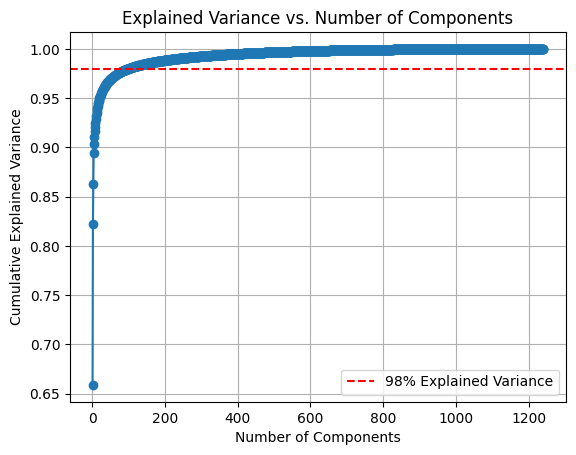

Number of components for 98% explained variance: 100


In [6]:
plot_pca_variance(X_train_fingerprints)

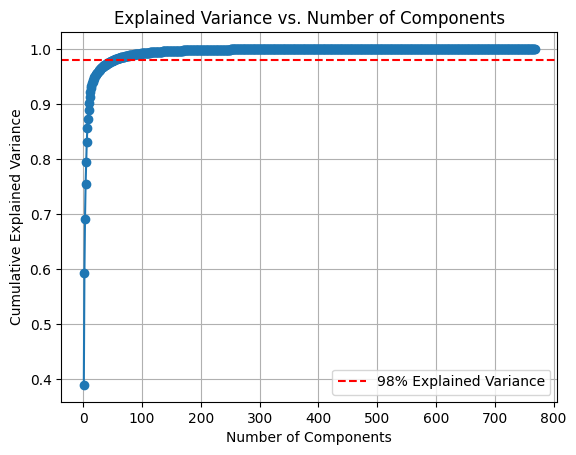

Number of components for 98% explained variance: 53


In [7]:
plot_pca_variance(X_train_embeddings)

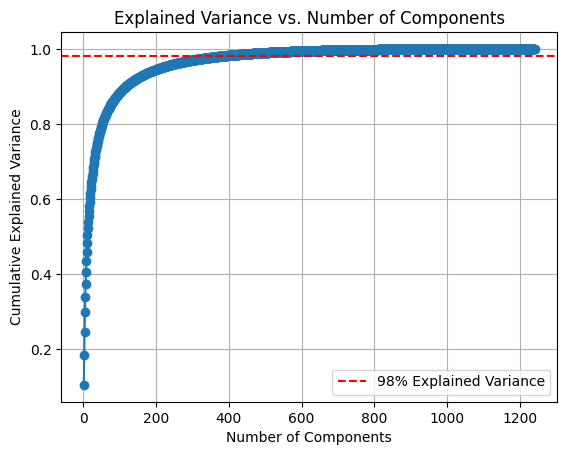

Number of components for 98% explained variance: 373


In [12]:
plot_pca_variance(X_train_openai)

# 2. Scree Plot (Elbow Method)
The scree plot visualizes the explained variance by each component. Look for the "elbow point," where adding more components yields diminishing returns in explained variance.

Steps:
- Plot the explained variance for each component.
- Identify the elbow point (a significant drop-off in variance).

In [ ]:
def plot_elbow(X_input):
    """
    Plot the explained variance ratio for each component
    :param X_input: input data
    :return: None
    """
    
    # Fit PCA
    pca = PCA()
    pca.fit(X_input)

    # Plot explained variance for each component
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
    plt.xlabel("Number of Components")
    plt.ylabel("Explained Variance Ratio")
    plt.title("Scree Plot")
    plt.grid()
    plt.show()
    

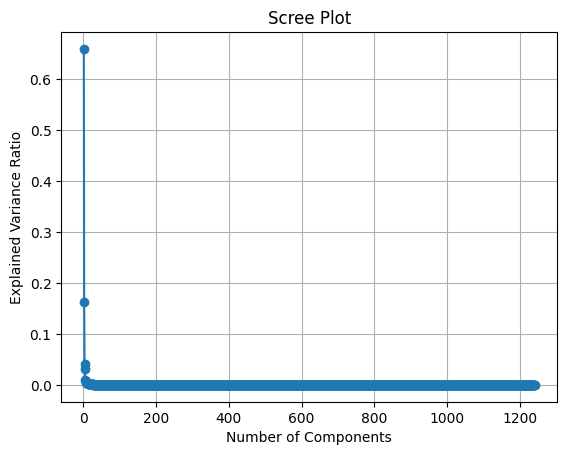

In [16]:
plot_elbow(X_train_fingerprints)

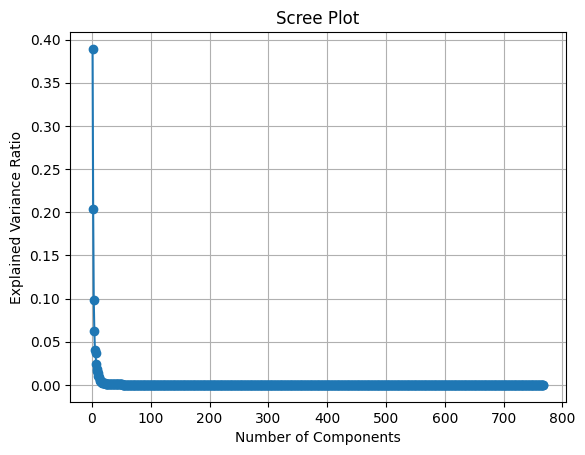

In [17]:
plot_elbow(X_train_embeddings)

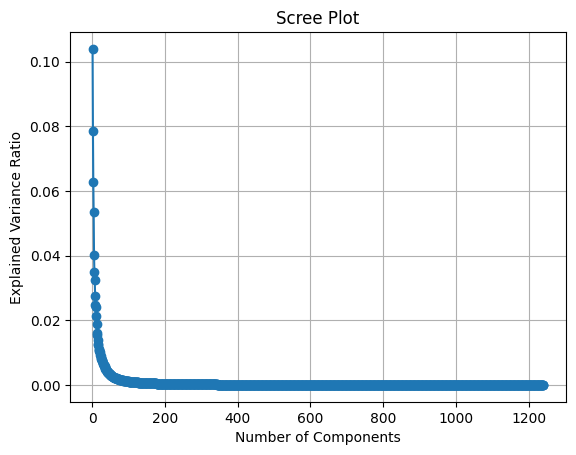

In [18]:
plot_elbow(X_train_openai)

# 3. Eigenvalues > 1 Rule (Kaiser’s Criterion)
In some cases (e.g., PCA on correlation matrix), you can select components with eigenvalues greater than 1.

Steps:
- Compute the eigenvalues of the covariance matrix.
- Select components with eigenvalues > 1.

In [20]:
def plot_eigenvalues(X_input, n_components):
    """
    Plot the eigenvalues of PCA components
    :param X_input: input data
    :param n_components: number of components
    :return: None
    """

    # Fit PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_input)

    eigenvalues = pca.explained_variance_
    n_components_eigen_gt1 = sum(eigenvalues > 1)
    print(f"Number of components with eigenvalues > 1: {n_components_eigen_gt1}")

In [23]:
# plot the eigenvalues for fingerprints
plot_eigenvalues(X_train_fingerprints, 1000)

Number of components with eigenvalues > 1: 171


In [25]:
plot_eigenvalues(X_train_embeddings, 700)

Number of components with eigenvalues > 1: 3


In [26]:
plot_eigenvalues(X_train_openai, 1000)

Number of components with eigenvalues > 1: 0


# 4. Cross-Validation (Using Model Performance)
Evaluate how the number of components impacts the performance of a machine learning model.

Steps:
- Use PCA to reduce dimensions to different numbers of components.
- Train a model (e.g., Logistic Regression, Random Forest) on the transformed data.
- Evaluate model performance (e.g., AUC, accuracy) using cross-validation.

In [14]:
def cross_val_score_pca(X_input, y_input):
    """
    Evaluate the model performance using cross-validation with PCA
    :param X_input: input data
    :param y_input: target data
    :param n_components: number of components
    :return: None
    """
    # Iterate over possible numbers of components
    n_components_list = range(10, 500, 10)
    cv_scores = []

    for n_components in n_components_list:
        try:
            # Fit PCA
            pca = PCA(n_components=n_components)
            X_input_pca = pca.fit_transform(X_input)
            
            # Evaluate model performance using cross-validation
            model = LogisticRegression()
            scores = cross_val_score(model, X_input_pca, y_input, cv=5, scoring='roc_auc')
            cv_scores.append(scores.mean())
        except Exception as e:
            print(e)
            break

    # Plot performance vs. number of components
    plt.plot(list(n_components_list), cv_scores, marker='o')
    plt.xlabel("Number of Components")
    plt.ylabel("Cross-Validated AUC")
    plt.title("Model Performance vs. Number of Components")
    plt.grid()
    plt.show()

    # Best number of components
    best_n_components = list(n_components_list)[cv_scores.index(max(cv_scores))]
    print(f"Best number of components: {best_n_components}")
    print(f"Best AUC: {max(cv_scores)}")


c:\Users\predator\anaconda3\envs\dili-3.10\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\predator\anaconda3\envs\dili-3.10\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

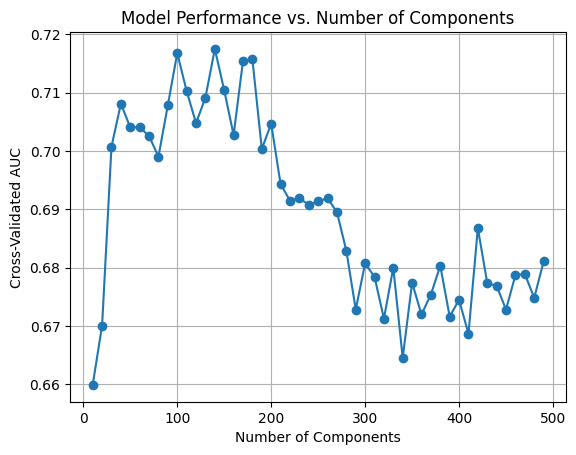

Best number of components: 140
Best AUC: 0.7175235738406627


In [15]:
# cross validation for fingerprints
cross_val_score_pca(X_train_fingerprints, y_train)

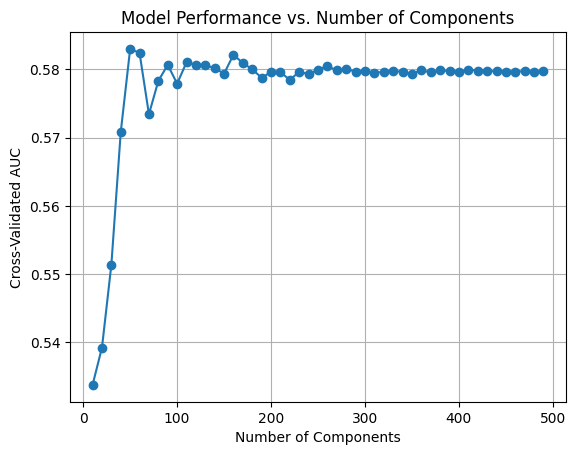

Best number of components: 50
Best AUC: 0.5829868477648508


In [16]:
# cross validation for fingerprints
cross_val_score_pca(X_train_embeddings, y_train)

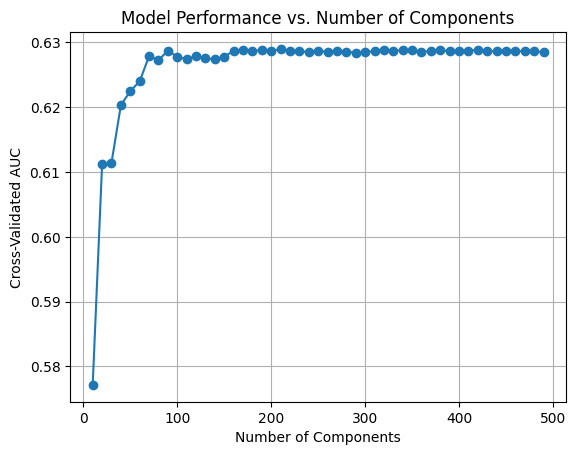

Best number of components: 210
Best AUC: 0.6289765089799977


In [17]:
cross_val_score_pca(X_train_openai, y_train)

In [19]:
# combine the fingerprints (PCA: 140), embeddings (PCA: 50), and openai (PCA: 210)
pca_fingerprints = PCA(n_components=140)
X_train_fingerprints_pca = pca_fingerprints.fit_transform(X_train_fingerprints)

pca_embeddings = PCA(n_components=50)
X_train_embeddings_pca = pca_embeddings.fit_transform(X_train_embeddings)

pca_openai = PCA(n_components=210)
X_train_openai_pca = pca_openai.fit_transform(X_train_openai)

X_train_combined = np.hstack((X_train_fingerprints_pca, X_train_embeddings_pca, X_train_openai_pca))
print(X_train_combined.shape)

(1241, 400)


In [34]:
# similarly, apply PCA to the test data
X_test_fingerprints_pca = pca_fingerprints.transform(X_test_fingerprints)
X_test_embeddings_pca = pca_embeddings.transform(X_test_embeddings)
X_test_openai_pca = pca_openai.transform(X_test_openai)

X_test_combined = np.hstack((X_test_fingerprints_pca, X_test_embeddings_pca, X_test_openai_pca))
print(X_test_combined.shape)

(286, 400)


In [21]:
# Evaluate model performance using cross-validation
model = LogisticRegression()
scores = cross_val_score(model, X_train_combined, y_train, cv=5, scoring='roc_auc')
scores.mean()

c:\Users\predator\anaconda3\envs\dili-3.10\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\predator\anaconda3\envs\dili-3.10\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

0.7078897376912888

# Optuna

In [22]:
import optuna
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

c:\Users\predator\anaconda3\envs\dili-3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
def objective(trial):
    # Suggest values for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", [None, "sqrt", "log2"])

    # Initialize the model with suggested hyperparameters
    model = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
    )

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = cross_val_score(
        model,
        X_train_combined,
        y_train,
        scoring=make_scorer(roc_auc_score, needs_proba=True),
        cv=cv,
    )
    return auc_scores.mean()

In [24]:
# Create Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2024-11-20 10:40:01,590] A new study created in memory with name: no-name-c8c2b6b0-9467-4c4e-b06a-d454aff54ddf
c:\Users\predator\anaconda3\envs\dili-3.10\lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[I 2024-11-20 10:40:03,942] Trial 0 finished with value: 0.7183321053564453 and parameters: {'n_estimators': 286, 'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7183321053564453.
c:\Users\predator\anaconda3\envs\dili-3.10\lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve t

In [25]:
# Print the best hyperparameters
print("Best hyperparameters:", study.best_params)
print("Best AUC score:", study.best_value)

Best hyperparameters: {'n_estimators': 383, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2'}
Best AUC score: 0.7268804710678906


In [26]:
# Train final model with the best parameters
best_params = study.best_params
final_model = ExtraTreesClassifier(**best_params, random_state=42)
final_model.fit(X_train_combined, y_train)

ExtraTreesClassifier(max_depth=20, max_features='log2', min_samples_leaf=3,
                     min_samples_split=4, n_estimators=383, random_state=42)

In [35]:
# Evaluate on the test set
y_pred_proba = final_model.predict_proba(X_test_combined)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC score:", test_auc)

Test AUC score: 0.7750783153498085
